In [49]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def G(x, m):
    return m[0] * np.exp(m[1] * x) + m[2] * x * np.exp(m[3] * x)

sigma = 0.01
x_data = np.linspace(1,7,25)

# These are the true values that we will attempt to recover
m_t = np.array([1,-.5,1,-.75])

# The 'data' which we generate with a noise signal
data = G(x_data,m_t) + np.random.randn(x_data.size) * sigma

In [51]:
# Initialize our 4 parameters
m_0 = np.zeros(4)
m_0[0] = np.random.uniform(low=0.0, high=2.0)
m_0[1] = np.random.uniform(low=-1.0, high=0.0)
m_0[2] = np.random.uniform(low=0.0, high=2.0)
m_0[3] = np.random.uniform(low=-1.0, high=0.0)

In [68]:
def log_likelihood(d, m, x, s):
    """ Computes the log of the likelihood function """
    return -(1 / 2) * np.sum(np.square(d - G(x, m)) / s ** 2)

def do_mcmc_step(m, d, x, s):
    """ Performs one MCMC step """
    # First we'll generate a proposed solution
    m_p = m + scipy.stats.norm.rvs(size=m.size, scale=s)

    # Find the log of the likelihood function
    log_alpha = np.minimum(0, log_likelihood(d, m_p, x, s) - log_likelihood(d, m, x, s))

    # Generate w in log(rand([0, 1])) and check if w < log(alpha)
    w = np.log(np.random.random())

    if w < log_alpha:   # Accept the proposal
        m_new = m_p
    else:               # Deny the proposal and keep the old m
        m_new = m

    return m_new


In [69]:
# Run one mcmc step to get our first proposed solution
sigma = 0.005
solution = do_mcmc_step(m_0, data, x_data, sigma)

# Now do 10,000 'burner' steps to get an initial estimate
for i in range(10000):
    solution = do_mcmc_step(solution, data, x_data, sigma)

In [70]:
# Run a whole lot of MCMC steps
m_sample = list()
for i in range(1, 100001):
    solution = do_mcmc_step(solution, data, x_data, sigma)
    # Sample variables every 1000 iterations
    if i % 100 == 0:
        m_sample.append(solution)

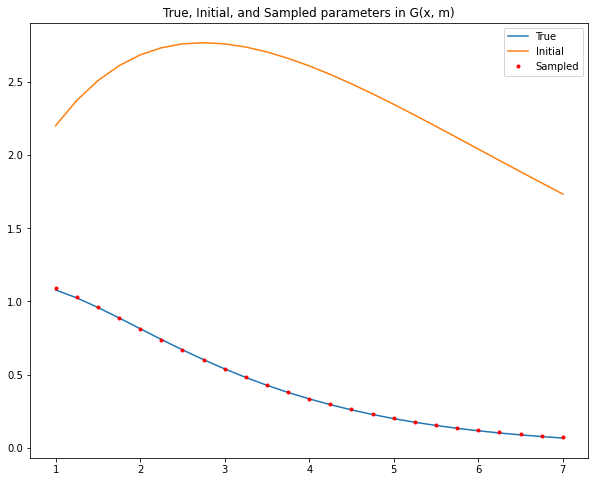

In [71]:
fig = plt.figure(figsize=(10,8))
plt.plot(x_data, G(x_data, m_t))
plt.plot(x_data, G(x_data, m_0))
plt.plot(x_data, G(x_data, solution), 'r.')
plt.title('True, Initial, and Sampled parameters in G(x, m)')
plt.legend(['True', 'Initial', 'Sampled'])
plt.show()

## How close were we? ##

To answer this I plotted histograms of every 1000 MCMC steps below, along with the mean and std

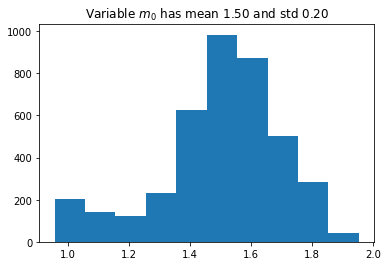

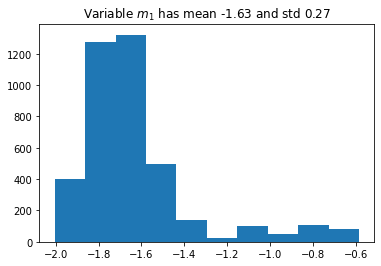

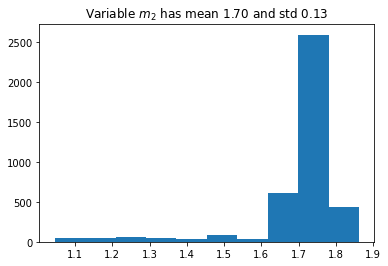

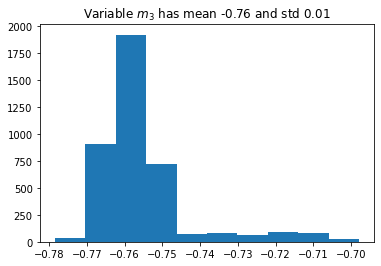

In [48]:
# Convert out list of our sampled variables to an np array
m_sample_array = np.array(m_sample)

# Plot our 4 variables as histograms, compute their mean/std
plt.hist(m_sample_array[:, 0], bins=10)
mean1 = np.mean(m_sample_array[:, 0])
std1 = np.std(m_sample_array[:, 0])
plt.title(f'Variable $m_0$ has mean {mean1:.2f} and std {std1:.2f}')
plt.show()

plt.hist(m_sample_array[:, 1], bins=10)
mean2 = np.mean(m_sample_array[:, 1])
std2 = np.std(m_sample_array[:, 1])
plt.title(f'Variable $m_1$ has mean {mean2:.2f} and std {std2:.2f}')
plt.show()

plt.hist(m_sample_array[:, 2], bins=10)
mean3 = np.mean(m_sample_array[:, 2])
std3 = np.std(m_sample_array[:, 2])
plt.title(f'Variable $m_2$ has mean {mean3:.2f} and std {std3:.2f}')
plt.show()

plt.hist(m_sample_array[:, 3], bins=10)
mean4 = np.mean(m_sample_array[:, 3])
std4 = np.std(m_sample_array[:, 3])
plt.title(f'Variable $m_3$ has mean {mean4:.2f} and std {std4:.2f}')
plt.show()

## Consider the following question: would it be better to double the size of the data set, or halve the errors in the data? ##

Intuitevly, I think that doubling the size of the data set will produce better results. I think this for two reasons:

1) Due to the high nonlinearity of the expression, we know that small changes in x will lead to large, exponential even since $\frac{dG}{dx} = m_0 m_1 e^{(m_1 x)} + m_2 e^{(m_3 x)} (m_3 x + 1)$, changes in G(x,m). So the more that we can capture changes in x in the data, then the more we'll be able to capture the non-linear effect in the output.

2) In addition to doubling our ability to explore the nonlinear effects of the function, we also double the amount of space we're exploring in each proposed step. Each MCMC step we generate a proposed solution by adding some Gaussian noise with standard deviation $\sigma$. Thus, when we double the data, we double the amount of random noise we add to the proposed solution. By increasing the amount of noise at each step, we also increase the chance that our parameters will move in a way that's closer to the true parameters.

But, I'm often wrong. So below I replicate the above histograms with two different models. One model doubles the data, and the other model halves the error in the data.

In [90]:
sigma_1 = 0.01
x_data_1 = np.linspace(1,7,50)

sigma_2 = 0.005
x_data_2 = np.linspace(1,7,25)


# The 'data' which we generate with a noise signal
data_1 = G(x_data_1,m_t) + np.random.randn(x_data_1.size) * sigma_1
data_2 = G(x_data_2,m_t) + np.random.randn(x_data_2.size) * sigma_2

In [91]:
# Run one mcmc step to get our first proposed solution
sigma = 0.005
solution_1 = do_mcmc_step(m_0, data_1, x_data_1, sigma)
solution_2 = do_mcmc_step(m_0, data_2, x_data_2, sigma)

# Now do 10,000 'burner' steps to get an initial estimate
for i in range(10000):
    solution_1 = do_mcmc_step(solution_1, data_1, x_data_1, sigma)
    solution_2 = do_mcmc_step(solution_2, data_2, x_data_2, sigma)

In [92]:
# Run a whole lot of MCMC steps
m_sample_1 = list()
m_sample_2 = list()

for i in range(1, 400001):
    solution_1 = do_mcmc_step(solution_1, data_1, x_data_1, sigma)
    solution_2 = do_mcmc_step(solution_2, data_2, x_data_2, sigma)
    
    # Sample variables every 1000 iterations
    if i % 1000 == 0:
        m_sample_1.append(solution_1)
        m_sample_2.append(solution_2)

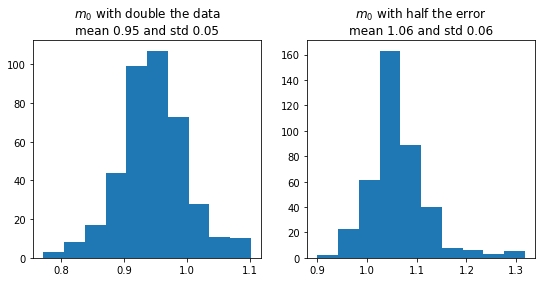

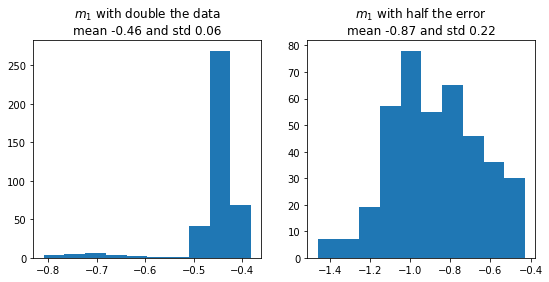

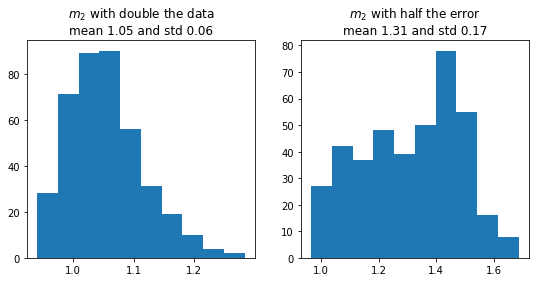

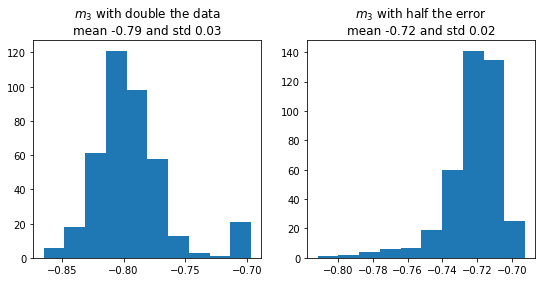

In [93]:
# Convert out list of our sampled variables to an np array
m_sample_array_1 = np.array(m_sample_1)
m_sample_array_2 = np.array(m_sample_2)

# Plot our 4 variables as histograms, compute their mean/std
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.hist(m_sample_array_1[:, 0], bins=10)
mean1 = np.mean(m_sample_array_1[:, 0])
std1 = np.std(m_sample_array_1[:, 0])
ax1.set_title('$m_0$ with double the data\n'
                f'mean {mean1:.2f} and std {std1:.2f}')
ax2 = fig.add_subplot(122)
ax2.hist(m_sample_array_2[:, 0], bins=10)
mean2 = np.mean(m_sample_array_2[:, 0])
std2 = np.std(m_sample_array_2[:, 0])
ax2.set_title('$m_0$ with half the error\n'
    f'mean {mean2:.2f} and std {std2:.2f}')
plt.show()

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.hist(m_sample_array_1[:, 1], bins=10)
mean1 = np.mean(m_sample_array_1[:, 1])
std1 = np.std(m_sample_array_1[:, 1])
ax1.set_title('$m_1$ with double the data\n'
                f'mean {mean1:.2f} and std {std1:.2f}')
ax2 = fig.add_subplot(122)
ax2.hist(m_sample_array_2[:, 1], bins=10)
mean2 = np.mean(m_sample_array_2[:, 1])
std2 = np.std(m_sample_array_2[:, 1])
ax2.set_title('$m_1$ with half the error\n'
    f'mean {mean2:.2f} and std {std2:.2f}')
plt.show()

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.hist(m_sample_array_1[:, 2], bins=10)
mean1 = np.mean(m_sample_array_1[:, 2])
std1 = np.std(m_sample_array_1[:, 2])
ax1.set_title('$m_2$ with double the data\n'
                f'mean {mean1:.2f} and std {std1:.2f}')
ax2 = fig.add_subplot(122)
ax2.hist(m_sample_array_2[:, 2], bins=10)
mean2 = np.mean(m_sample_array_2[:, 2])
std2 = np.std(m_sample_array_2[:, 2])
ax2.set_title('$m_2$ with half the error\n'
    f'mean {mean2:.2f} and std {std2:.2f}')
plt.show()

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.hist(m_sample_array_1[:, 3], bins=10)
mean1 = np.mean(m_sample_array_1[:, 3])
std1 = np.std(m_sample_array_1[:, 3])
ax1.set_title('$m_3$ with double the data\n'
                f'mean {mean1:.2f} and std {std1:.2f}')
ax2 = fig.add_subplot(122)
ax2.hist(m_sample_array_2[:, 3], bins=10)
mean2 = np.mean(m_sample_array_2[:, 3])
std2 = np.std(m_sample_array_2[:, 3])
ax2.set_title('$m_3$ with half the error\n'
    f'mean {mean2:.2f} and std {std2:.2f}')
plt.show()